In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
df = pd.read_excel('CBS_IE_formatted.xlsx')

In [8]:
df

,Perioden,BrutoProductie_1,EigenVerbruikBijElektrProductie_2,NettoProductieTotaal_3,Kernenergie_4,BrandstoffenTotaal_5,Kolen_6,Olieproducten_7,Aardgas_8,Biomassa_9,...,VerenigdKoninkrijk_21,Noorwegen_22,UitvoerTotaal_23,Belgie_24,Denemarken_25,Duitsland_26,VerenigdKoninkrijk_27,Noorwegen_28,Distributieverliezen_29,NettoVerbruikBerekend_30
0,1929JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
1,1930JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
2,1931JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
3,1932JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
4,1933JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2020MM10,10499.0,300.0,10199.0,354.0,7507.0,1097.0,107.0,5435.0,727.0,...,27.0,508.0,1930,1127.0,0.0,259,540.0,5.0,435.0,9675.0
629,2020MM11,10427.0,301.0,10126.0,301.0,7908.0,1073.0,86.0,5873.0,745.0,...,45.0,350.0,1850,911.0,0.0,481,455.0,3.0,446.0,9621.0
630,2020MM12,10849.0,318.0,10531.0,357.0,8202.0,1075.0,80.0,6092.0,812.0,...,14.0,460.0,1597,919.0,0.0,555,123.0,0.0,466.0,10196.0
631,2020JJ00,122377.0,3457.0,118920.0,3865.0,91178.0,9597.0,1295.0,70848.0,7785.0,...,541.0,4621.0,22433,7806.0,1053.0,8677,4787.0,110.0,5053.0,111208.0


In [9]:
#I will put a new name to columns I want use 
df.rename({'Perioden':'Period',
             'BrutoProductie_1':'Gross production', 
             'EigenVerbruikBijElektrProductie_2': 'Own consumption for electricity production',
             'NettoProductieTotaal_3': 'Net production | Total',
             'Kernenergie_4':'Nuclear energy',
             'BrandstoffenTotaal_5': 'Fuels',
             'Kolen_6':'Coal',
             'Olieproducten_7': 'Oil products',
             'Aardgas_8':'Natural gas',
             'Biomassa_9':'Biomass', 'OverigeBrandstoffenNietHernieuwbaar_10':'Other Fuels Not Renewable',
             'Waterkracht_11':'Hydropower',
             'WindenergieTotaal_12':'Wind energy|Total',
             'WindenergieOpLand_13':'Wind energy on land',
             'WindenergieOpZee_14':'Wind energy at sea',
             'Zonnestroom_15':'Solar power',
             'OverigeBronnen_16':'Other sources' }, axis = 'columns',inplace=True)

In [10]:
#I will clean the columns that I don't have to use 
df.drop([ 'InvoerTotaal_17',
         'Belgie_18',
         'Denemarken_19',
         'Duitsland_20',
         'VerenigdKoninkrijk_21',
         'Noorwegen_22',
         'UitvoerTotaal_23',
         'Belgie_24',
         'Denemarken_25',
         'Duitsland_26',
         'VerenigdKoninkrijk_27',
         'Noorwegen_28',
         'Distributieverliezen_29','NettoVerbruikBerekend_30'], axis = 'columns', inplace = True)

In [11]:
df.head(1)

,Period,Gross production,Own consumption for electricity production,Net production | Total,Nuclear energy,Fuels,Coal,Oil products,Natural gas,Biomass,Other Fuels Not Renewable,Hydropower,Wind energy|Total,Wind energy on land,Wind energy at sea,Solar power,Other sources
0,1929JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.fillna(0, inplace = True)

In [13]:
#Created two new columns "Year" and "Month" 
df['Year'] = df['Period'].str[:4]
df['Month'] = df['Period'].str[-2:]

#Checked if everyhting worked out 
df[['Period', 'Year', 'Month', 'Wind energy|Total']]
df.tail(20)

,Period,Gross production,Own consumption for electricity production,Net production | Total,Nuclear energy,Fuels,Coal,Oil products,Natural gas,Biomass,Other Fuels Not Renewable,Hydropower,Wind energy|Total,Wind energy on land,Wind energy at sea,Solar power,Other sources,Year,Month
613,2019MM08,9157.0,250.0,8907.0,318.0,7049.0,636.0,121.0,5745.0,417.0,129.0,1.0,761.0,502.0,258.0,740.0,38.0,2019,08
614,2019MM09,9231.0,257.0,8974.0,337.0,7189.0,544.0,142.0,6155.0,249.0,98.0,1.0,925.0,612.0,313.0,486.0,38.0,2019,09
615,2019MM10,10910.0,314.0,10596.0,354.0,8823.0,1631.0,152.0,6530.0,379.0,131.0,5.0,1111.0,753.0,358.0,267.0,36.0,2019,10
616,2019MM11,11244.0,356.0,10888.0,348.0,9410.0,2263.0,129.0,6225.0,666.0,127.0,8.0,937.0,632.0,306.0,147.0,38.0,2019,11
617,2019MM12,10832.0,306.0,10526.0,360.0,8531.0,1995.0,136.0,5553.0,710.0,137.0,8.0,1478.0,1068.0,411.0,109.0,39.0,2019,12
618,2019JJ00,121062.0,3490.0,117572.0,3700.0,96460.0,19266.0,1385.0,69172.0,5060.0,1577.0,74.0,11508.0,7935.0,3573.0,5336.0,493.0,2019,00
619,2020MM01,11534.0,305.0,11228.0,361.0,9186.0,928.0,148.0,7467.0,504.0,140.0,11.0,1515.0,1098.0,417.0,116.0,40.0,2020,01
620,2020MM02,10304.0,280.0,10023.0,330.0,7543.0,843.0,146.0,5848.0,578.0,128.0,2.0,1899.0,1477.0,423.0,210.0,39.0,2020,02
621,2020MM03,9959.0,290.0,9669.0,360.0,7192.0,923.0,140.0,5314.0,699.0,116.0,6.0,1451.0,1081.0,370.0,619.0,41.0,2020,03
622,2020MM04,8289.0,262.0,8027.0,347.0,5785.0,473.0,105.0,4516.0,548.0,142.0,7.0,817.0,597.0,221.0,1032.0,40.0,2020,04


In [14]:
 df[['Year','Month','Gross production', 'Wind energy|Total', 'Biomass']].dtypes

Year                  object
Month                 object
Gross production     float64
Wind energy|Total    float64
Biomass              float64
dtype: object

In [15]:
#Converting every object taht I will use to numeric value 
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])
df['Gross production'] = df['Gross production'].astype(int)
df['Wind energy|Total'] = df['Wind energy|Total'].astype(int)
df['Biomass'] = df['Biomass'].astype(int)

In [16]:
 df[['Year','Month','Gross production', 'Wind energy|Total', 'Biomass']].dtypes

Year                 int64
Month                int64
Gross production     int64
Wind energy|Total    int64
Biomass              int64
dtype: object

In [17]:
#Creating a range of ten years to plot and using 0 in the index to get the total produced on that year
Years = df[df.Month == 0]
Range = ( Years['Year'] >= 2000) & (df['Year'] <= 2020)




In [18]:
#Creating a lsit with the range of ten years for every column that I will use 
wind_total = df[Range]['Wind energy|Total']
gross = df[Range]['Gross production']
solar = df[Range]['Solar power']
year_10 = df[Range]['Year']

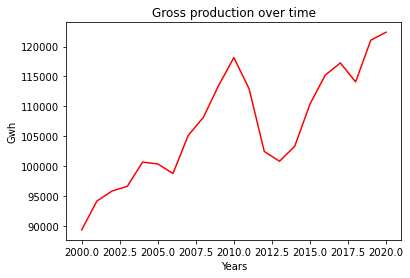

In [19]:
#Linear subplot of overral energy production 
plt.plot(df[Range]['Year'], df[Range]['Gross production'], color='r')
plt.title('Gross production over time')
plt.xlabel('Years')
plt.ylabel('Gwh')
plt.savefig('Gross production over time.png', transparent=True)
plt.show()

Text(0, 0.5, 'Gross Production')

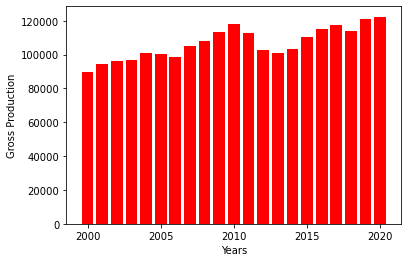

In [20]:
#Bar graphic to showcase difference on production of electricity 
fig, ax = plt.subplots()

ax.bar(year_10, gross,color = 'r') 
ax.set_xlabel('Years')
ax.set_ylabel("Gross Production")

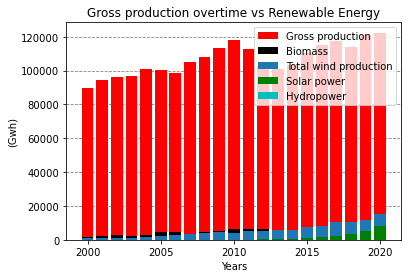

In [21]:
# Renewable energies vs Gross production 
fig, ax = plt.subplots()



ax.bar(year_10, df[Range]['Gross production'],color = 'r', label= "Gross production") 
plt.title('Gross production overtime vs Renewable Energy')
ax.set_xlabel('Years')
ax.set_ylabel("(Gwh)")
ax.bar(year_10,df[Range]['Biomass'], color ='k', label="Biomass")
ax.bar(year_10, wind_total, label= "Total wind production" )
ax.bar(year_10,df[Range]['Solar power'], color ='g', label="Solar power")
ax.bar(year_10,df[Range]['Hydropower'], color ='c', label="Hydropower") 
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend()

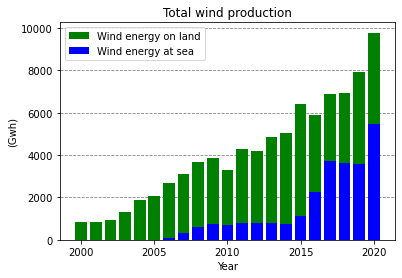

In [22]:
#Total wind vs produced on land and sea
fig, ax = plt.subplots()

ax.bar(year_10,df[Range]['Wind energy on land'], color ='g', label="Wind energy on land") 
ax.bar(year_10,df[Range]['Wind energy at sea'], color ='b', label="Wind energy at sea")
plt.title('Total wind production')
ax.set_xlabel('Year')
ax.set_ylabel('(Gwh)')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.legend()

In [23]:
Years

,Period,Gross production,Own consumption for electricity production,Net production | Total,Nuclear energy,Fuels,Coal,Oil products,Natural gas,Biomass,Other Fuels Not Renewable,Hydropower,Wind energy|Total,Wind energy on land,Wind energy at sea,Solar power,Other sources,Year,Month
0,1929JJ00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1929,0
1,1930JJ00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1930,0
2,1931JJ00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1931,0
3,1932JJ00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1932,0
4,1933JJ00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,2016JJ00,115213,4181.0,111032.0,3750.0,96122.0,37659.0,1241.0,51491.0,4248,1484.0,100.0,8170,5901.0,2269.0,1602.0,1288.0,2016,0
592,2017JJ00,117260,3795.0,113465.0,3278.0,95895.0,32616.0,1154.0,56755.0,3926,1443.0,61.0,10569,6869.0,3700.0,2204.0,1459.0,2017,0
605,2018JJ00,114103,3411.0,110692.0,3395.0,92429.0,29214.0,1267.0,56258.0,3922,1767.0,72.0,10549,6918.0,3630.0,3709.0,538.0,2018,0
618,2019JJ00,121062,3490.0,117572.0,3700.0,96460.0,19266.0,1385.0,69172.0,5060,1577.0,74.0,11508,7935.0,3573.0,5336.0,493.0,2019,0


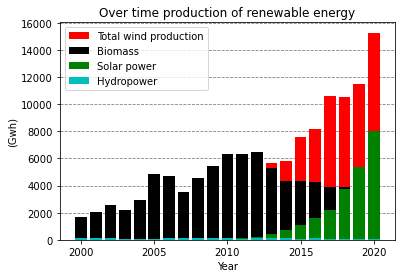

In [24]:
#All renewable energies compared with each other in a bar graph 

fig, ax = plt.subplots()
ax.bar(year_10, wind_total,color = 'r', label= "Total wind production")
ax.bar(year_10,df[Range]['Biomass'], color ='k', label="Biomass")
ax.bar(year_10,df[Range]['Solar power'], color ='g', label="Solar power")
ax.bar(year_10,df[Range]['Hydropower'], color ='c', label="Hydropower") 
plt.title('Over time production of renewable energy')
ax.set_xlabel('Year')
ax.set_ylabel('(Gwh)')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.legend()

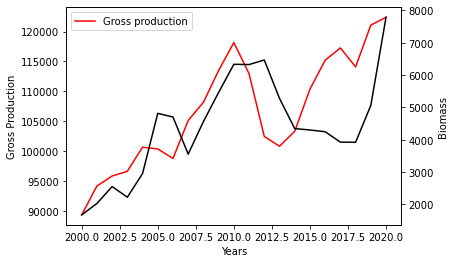

In [25]:
#Good try but noe let's try it in bar chart

fig, ax= plt.subplots()

ax.plot(df[Range]['Year'], df[Range]['Gross production'],color = 'r', label='Gross production')
ax.set_xlabel('Years')
ax.set_ylabel('Gross Production')

ax2 = ax.twinx()
ax2.plot(year_10,df[Range]['Biomass'], color ='k', label="Biomass")
ax2.set_ylabel('Biomass')
ax.legend()








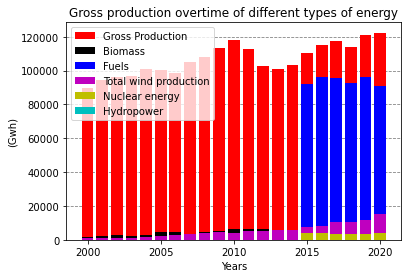

In [26]:
fig, ax = plt.subplots()

ax.bar(year_10, gross,color = 'r', label="Gross Production") 
plt.title('Gross production overtime of different types of energy')
ax.set_xlabel('Years')
ax.set_ylabel("(Gwh)")

ax.bar(year_10,df[Range]['Biomass'], color ='k', label="Biomass")

ax.bar(year_10,df[Range]['Fuels'], color ='b', label="Fuels")
ax.bar(year_10, wind_total,color='m', label= "Total wind production" )
ax.bar(year_10,df[Range]['Nuclear energy'], color ='y', label= "Nuclear energy")
ax.bar(year_10,df[Range]['Hydropower'], color ='c', label="Hydropower")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.legend()


ValueError: Could not interpret value `Years` for parameter `x`